(/inputs)
do shape
do balue counts
left=stock, right=firms ,left on= ['permno', 'year'], right _on=['permno','fyear'], how='inner')

(
    sample.pivot_table(index='ind',columns='state', values='permno', aggfunc=['nunique','count'])
    .stack(level=0)
)

.style.format("{:.3f}") == this makes only 3 decimals 


always group. by firm and year

# Practicing on Diamonds


tall vs long dataset
-do whatever is the easiet, pandas has many functions to plot by these

pd.bar

AxesSubplot(0.125,0.125;0.775x0.755)


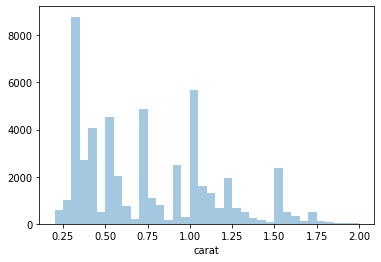

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

diamonds = sns.load_dataset('diamonds')
diamonds # notice shape, unit, key, etc...

# my turn: lets do the usual immediate explorations including the categorical vars
diamonds.describe()
# my turn: explore carats - how many are 0.99 vs 1 carat? why?
# sns.countplot(diamonds['carat'])
# explore dist of x, y, z: what did you learn? which is width, length, depth?
print(sns.distplot(diamonds['carat'], kde=False, bins=np.arange(0.2,2.05,.05).tolist()))


# your turn: explore price - is there anything unusual? (HINT: try many bin widths)

# my turn: how is carat related to price?
# your turn: how is price related to cut?

# how should we deal with outliers? delete obs? replace with nan? winsorize? show each...


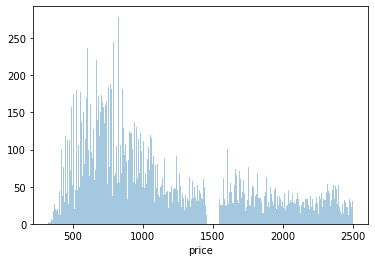

In [2]:
#your turn: explore price - is there anything unusual? (HINT: try many bin widths)
sns.distplot(diamonds.query('price<2500')['price'], kde=False,bins=500)


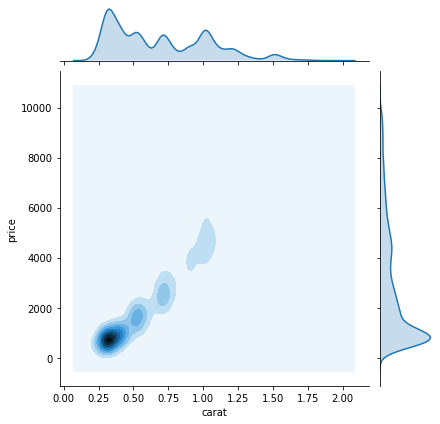

In [3]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), y='price', x='carat', kind='kde')

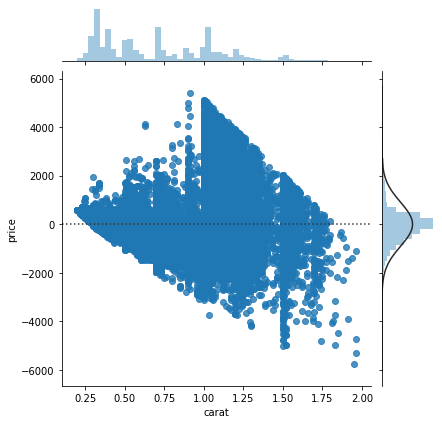

In [4]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), y='price', x='carat', kind='residual')



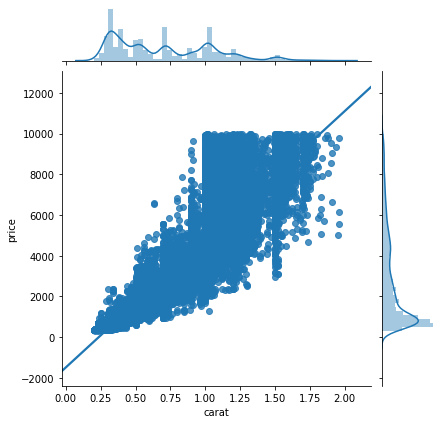

In [5]:
sns.jointplot(data=diamonds.query('carat<2 & price<10000'), y='price', x='carat', kind='reg')

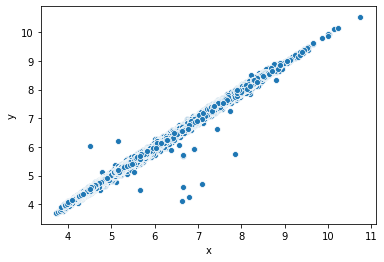

In [6]:
sns.scatterplot(data=diamonds.query('y < 20 & x > 2.5'), x='x', y='y') #how to deal with outliers

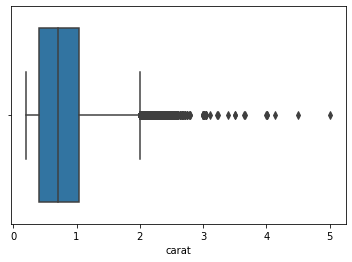

In [7]:
sns.boxplot(x='carat',data=diamonds)

AxesSubplot(0.125,0.125;0.775x0.755)


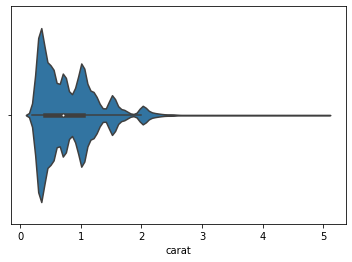

In [8]:
print(sns.violinplot(x=diamonds ['carat']))

In [9]:
diamonds['cut'].value_counts() #for all the categorical values

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

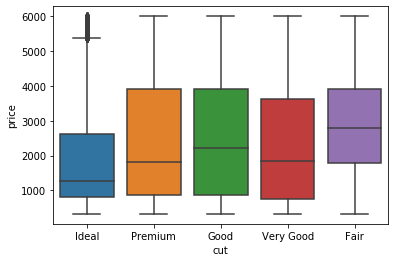

In [10]:
# your turn: how is price related to cut?
sns.boxplot(data=diamonds.query('price<6000'), x='cut', y='price') #ordering matters

# Vis Practice

In [11]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
2000-01-10,3.030393,36.108448,20.370028
2000-01-11,2.875386,35.183617,20.179594
2000-01-12,2.702940,34.037640,19.499504
2000-01-13,2.999391,34.680992,19.347162


In [12]:
stock_prices=stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns=['Firms', 'Date', 'Adj Close']
stock_prices#changes indexes into variables

,Firms,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
5,AAPL,2000-01-10,3.030393
6,AAPL,2000-01-11,2.875386
7,AAPL,2000-01-12,2.702940
8,AAPL,2000-01-13,2.999391
9,AAPL,2000-01-14,3.113708


In [15]:
stock_prices['ret'] = stock_prices.groupby('Firms')['Adj Close'].pct_change()
print(stock_prices.head())
 

  Firms       Date  Adj Close       ret
0  AAPL 2000-01-03   3.470226       NaN
1  AAPL 2000-01-04   3.177650 -0.084310
2  AAPL 2000-01-05   3.224152  0.014634
3  AAPL 2000-01-06   2.945139 -0.086538
4  AAPL 2000-01-07   3.084645  0.047368


In [18]:
#Q1
stock_prices['ret'].isna().sum()


3

In [19]:
#Q2
stock_prices.groupby('Firms') ['ret'].describe()

,count,mean,std,min,25%,50%,75%,max
Firms,,,,,,,,
AAPL,5060.0,0.001235,0.025351,-0.518692,-0.010326,0.000899,0.012946,0.139049
MSFT,5060.0,0.000494,0.018967,-0.155977,-0.008045,0.000337,0.008933,0.195652
VZ,5060.0,0.000323,0.015350,-0.118461,-0.007238,0.000395,0.007704,0.146324


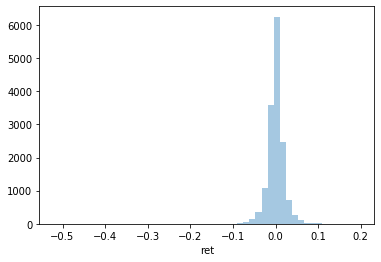

In [21]:
#question 3
sns.distplot(stock_prices['ret'].dropna(),kde=False)  #false takes off density estimater

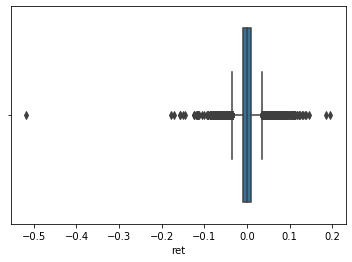

In [22]:
sns.boxplot(x='ret',data=stock_prices)

/Users/julaiseicaguana/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


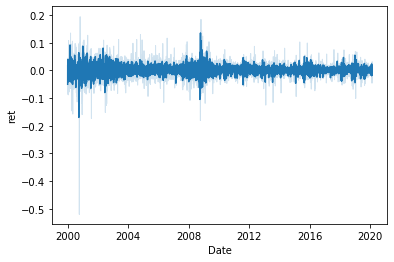

In [23]:
#sns.lineplot(data=stock_prices,x='Date', y='ret')